# Analisis exploratorio (EDA)

A continuación, cargaremos el conjunto de datos *Agricultural Pests Image Dataset*. Este contiene datos de imágenes de plagas agrícolas; es una colección de clases: hormigas, abejas, escarabajos, orugas, lombrices de tierra, tijeretas, saltamontes, polillas, babosas, caracoles, avispas y gorgojos.

El conjunto de datos proporciona una gama diversa de imágenes que cubren una variedad de formas, colores y tamaños, por lo que es adecuado para la formación y prueba de algoritmos para detectar y clasificar las plagas en diversos escenarios.

Importemos los paquetes necesarios

In [1]:
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
import os
import kagglehub

Ahora carguemos el conjunto de datos usando la API de Kaggle

In [2]:
path = kagglehub.dataset_download("vencerlanz09/agricultural-pests-image-dataset")

100%|██████████| 102M/102M [00:01<00:00, 86.3MB/s]

Extracting files...


Para realizar un Análisis Exploratorio de Datos eficaz en este conjunto de imágenes para la detección de plagas, primero debemos obtener una visión general del dataset y la distribución de clases, contando el número total de imágenes y, crucialmente, visualizando cuántas imágenes pertenecen a cada categoría de plaga para identificar desblances. Seguidamente, es fundamental llevar a cabo una inspección visual de las muestras, revisando aleatoriamente imágenes de cada clase para evaluar su calidad, iluminación, variabilidad de fondos y la apariencia de las plagas, detectando así posibles inconsistencias o errores de etiquetado. El tercer paso implica analizar las propiedades de las imágenes de forma programática, determinando la distribución de sus dimensiones (ancho y alto) para entender cómo estandarizarlas, y confirmando que todas las imágenes estén en el modo de color esperado. Finalmente, debes identificar y abordar las anomalías en los datos, buscando imágenes corruptas o ilegibles, detectando duplicados que puedan sesgar tu entrenamiento, y corrigiendo cualquier etiquetado incorrecto descubierto durante la inspección visual, sentando así una base sólida para el entrenamiento de un modelo profundo.

# 1. Visión General del Dataset

Numero de clases 12
  ants: 499 imágenes
  snail: 500 imágenes
  catterpillar: 434 imágenes
  earthworms: 323 imágenes
  beetle: 416 imágenes
  bees: 500 imágenes
  wasp: 498 imágenes
  weevil: 485 imágenes
  grasshopper: 485 imágenes
  earwig: 466 imágenes
  slug: 391 imágenes
  moth: 497 imágenes


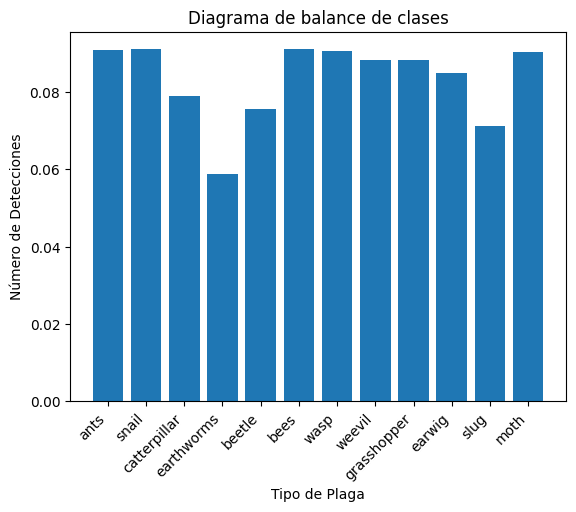

In [3]:
classes = os.listdir(path)
print(f'Numero de clases {len(classes)}')

class_n = []

for Class in classes:
    images_class = os.listdir(f'{path}/{Class}')
    class_n.append(len(images_class))
    print(f'  {Class}: {len(images_class)} imágenes')

plt.bar(classes, np.array(class_n)/np.sum(class_n))

plt.xlabel('Tipo de Plaga')
plt.ylabel('Número de Detecciones')
plt.title('Diagrama de balance de clases')

plt.xticks(rotation=45, ha='right')
plt.show()

En tu conjunto de datos, se evidencia un desbalance moderado de clases. La clase "Gusano de Tierra" es la minoritaria, representando apenas el 6% del total de imágenes en el dataset. Este porcentaje no representa una mayor preocupacion, pues comparado con el resto de las clases de plagas, ya que "Gusano de Tierra" constituye un 2% menos que el promedio de las demás categorías.

# 2. Inspección visual

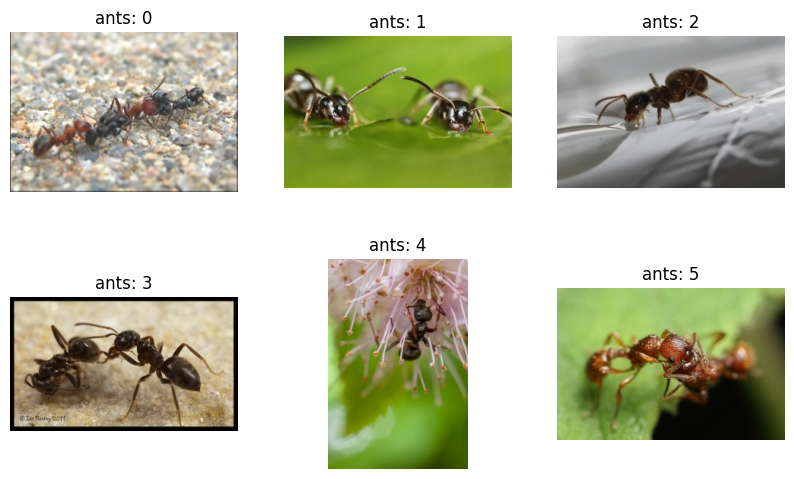

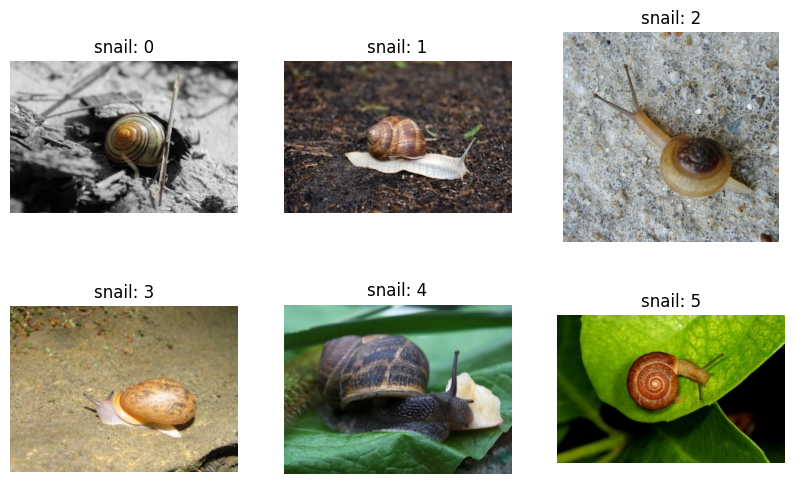

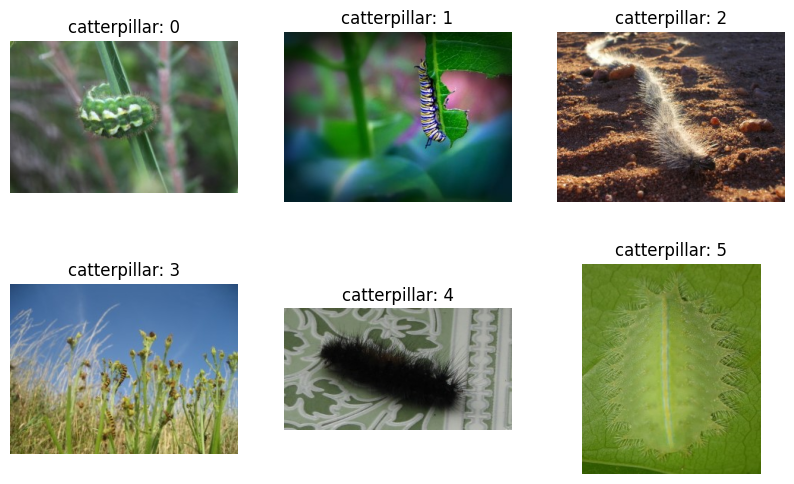

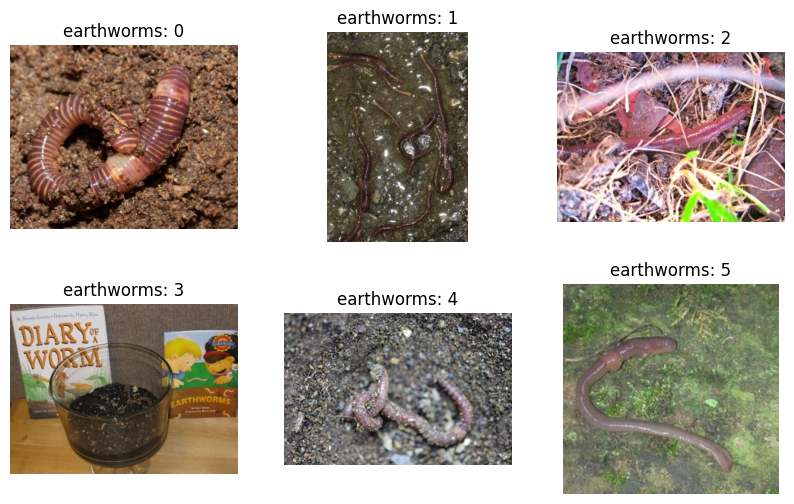

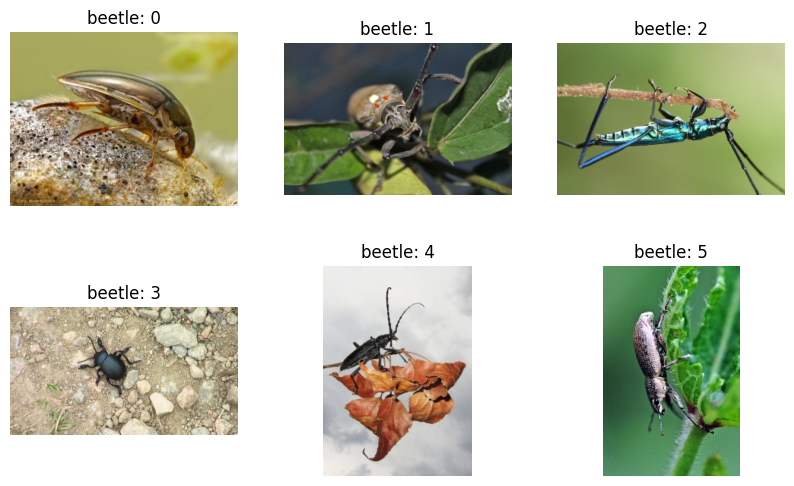

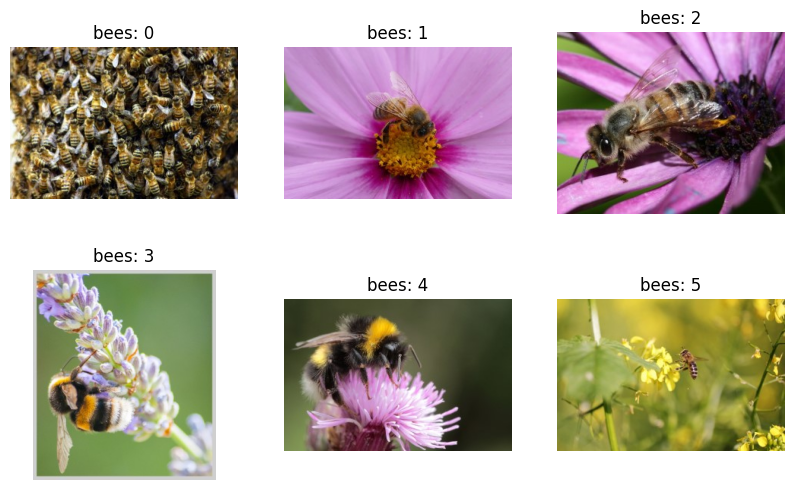

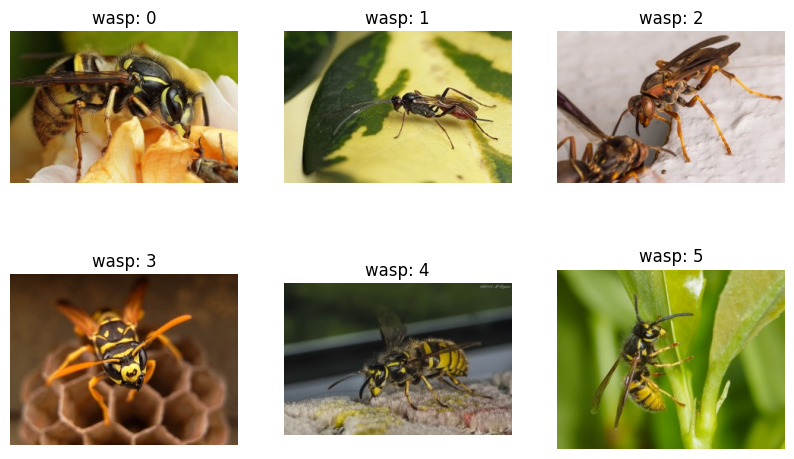

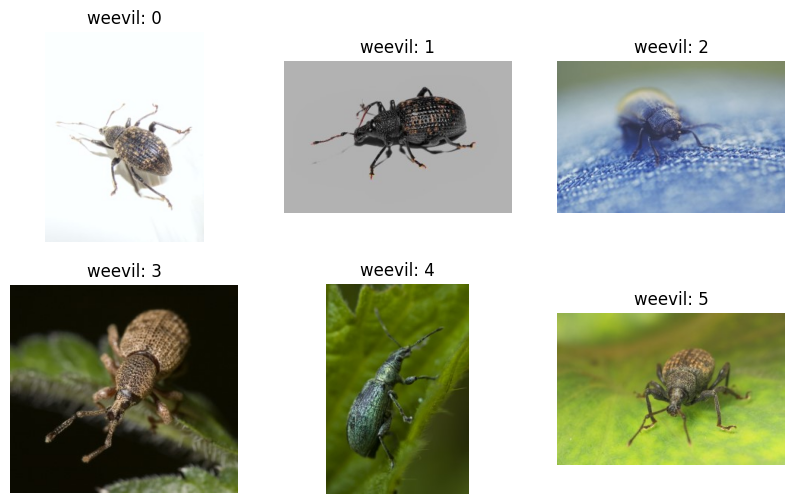

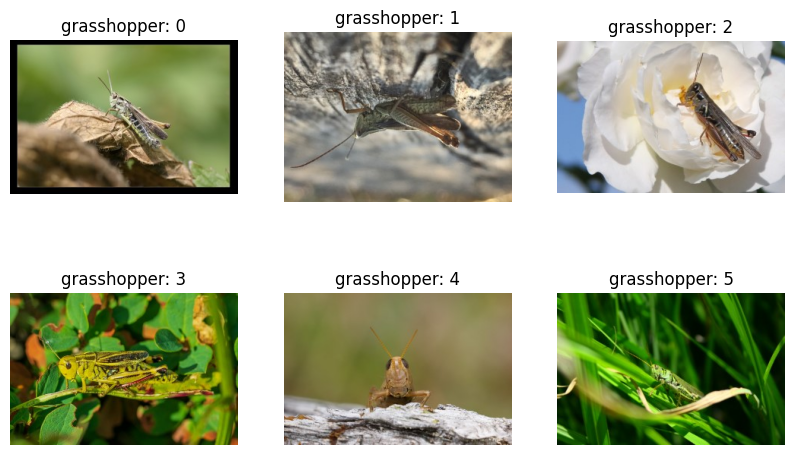

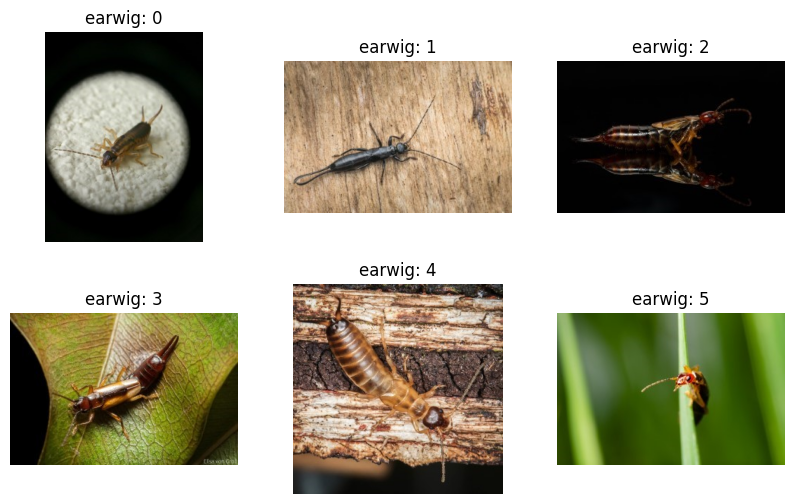

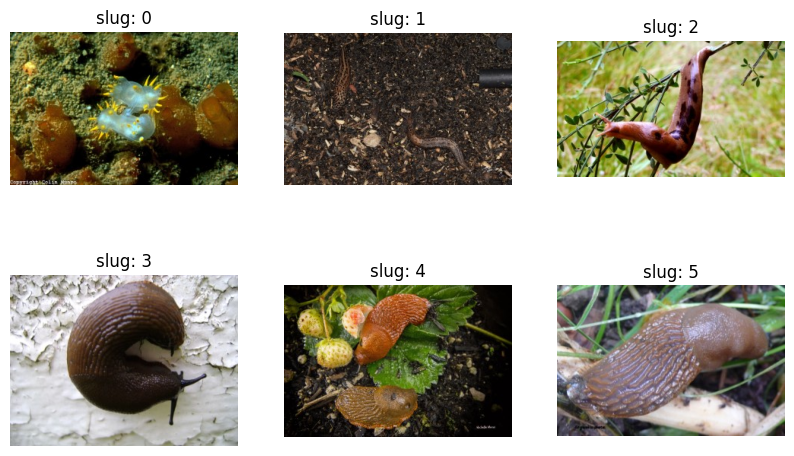

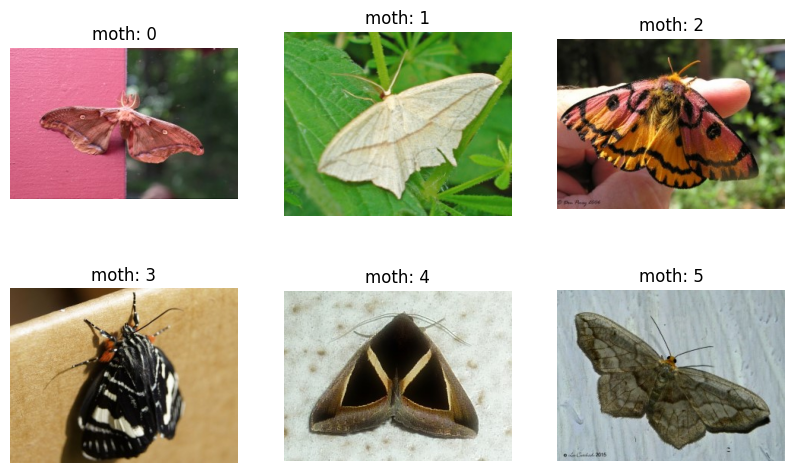

In [4]:
classes = os.listdir(path)
for Class in classes:
    images_class = os.listdir(f'{path}/{Class}')

    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    axes = axes.flatten()
    for i, image_name in enumerate(images_class[:6]):
        img = io.imread(f'{path}/{Class}/{image_name}')
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'{Class}: {i}')

Aunque el conjunto de datos de plagas no presenta errores de etiquetado, se observa una alta heterogeneidad en las imágenes, un desafío clave debido a la inclusión de diferentes especies de una misma familia dentro de la misma clase y a la inconsistencia en la adquisición de las tomas, que varían en ángulos, fondos y proporciones. Estas características, que complican el problema de detección, se espera que sean mitigadas por la naturaleza invariante de los modelos convolucionales (CNNs), los cuales están intrínsecamente diseñados para reconocer patrones independientemente de su posición, escala o ligeras variaciones en la rotación y perspectiva, permitiéndoles aprender características robustas y generalizables de las plagas a pesar de las diversas condiciones de las imágenes.

# 3. Detección de anomalias

In [14]:
data = []

classes = os.listdir(path)
for Class in classes:
    images_class = os.listdir(f'{path}/{Class}')

    for i, image_name in enumerate(images_class):
      try:
        img = io.imread(f'{path}/{Class}/{image_name}')
        data.append([image_name, Class, img.shape[0], img.shape[1]])
      except:
        print(f'Error en la imagen: {path}/{Class}/{image_name}')

data = pd.DataFrame(data, columns=['image_name', 'class', 'height', 'width'])
data

image_name class  height  width
0      ants (31).jpg  ants     211    300
1     ants (411).jpg  ants     200    300
2     ants (260).jpg  ants     200    300
3     ants (175).jpg  ants     176    300
4     ants (347).jpg  ants     300    200
...              ...   ...     ...    ...
5489  moth (151).jpg  moth     225    300
5490   moth (56).jpg  moth     263    300
5491  moth (474).jpg  moth     175    300
5492  moth (259).jpg  moth     240    300
5493  moth (124).jpg  moth     225    300

[5494 rows x 4 columns]

No se reportan imagenes corruptas, lo que confirma la integridad y legibilidad de cada archivo. Esta ausencia de corrupción significa que todas las imágenes pueden ser cargadas y procesadas sin interrupciones por las librerías o frameworks de aprendizaje profundo, eliminando la necesidad de descartar datos valiosos y garantizando un flujo de trabajo fluido en las etapas de preprocesamiento y entrenamiento.

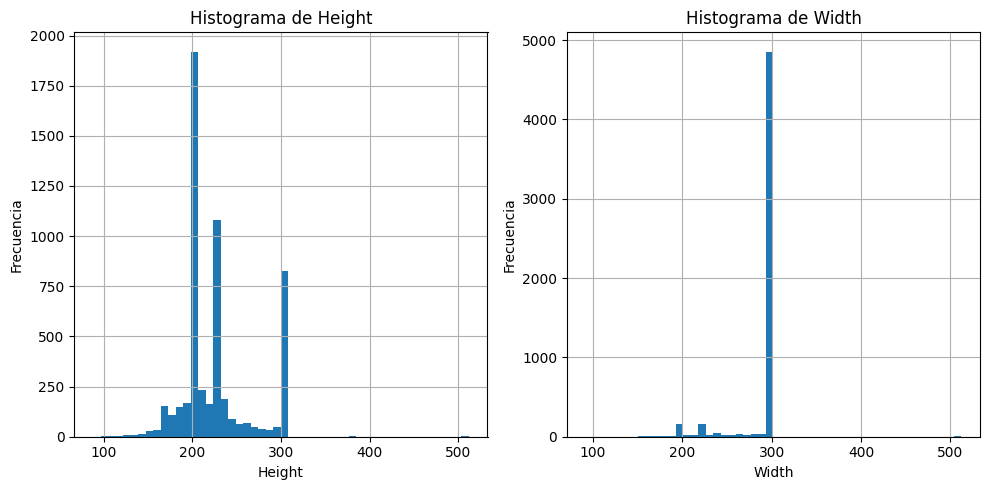

In [15]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['height'].hist(bins=50)
plt.title('Histograma de Height')
plt.xlabel('Height')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
data['width'].hist(bins=50)
plt.title('Histograma de Width')
plt.xlabel('Width')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Los histogramas de las dimensiones de las imágenes revelan que la mayoría de las imágenes tienen un ancho de 300 píxeles, mientras que la altura varía considerablemente. Esto sugiere que las imágenes fueron redimensionadas para tener un ancho uniforme, pero se mantuvo su relación de aspecto original, lo que resultó en alturas variables. Esta heterogeneidad en las alturas deberá ser considerada durante el preprocesamiento para el entrenamiento del modelo.